In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [2]:
print(train_X.shape)

(60000, 28, 28)


#### (a) Do SVD analysis


In [150]:
train_digits_X = train_X.reshape(60000, 784)
test_digits_X = test_X.reshape(10000, 784)
U, S, VT = np.linalg.svd(train_digits_X, full_matrices=False)
U1, S1, VT1 = np.linalg.svd(test_digits_X, full_matrices=False)
print(train_digits_X.shape)

(60000, 784)


#### (b) Singular Value Spectrum and how many nodes are necessary?


Text(0.5, 1.0, 'Singular Value Spectrum for Training Data')

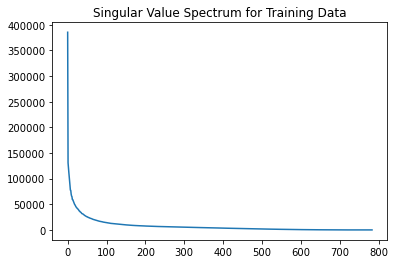

In [151]:

plt.figure()
plt.plot(S)
plt.imshow
plt.title('Singular Value Spectrum for Training Data')


Text(0.5, 1.0, 'Singular Value Spectrum for Testing Data')

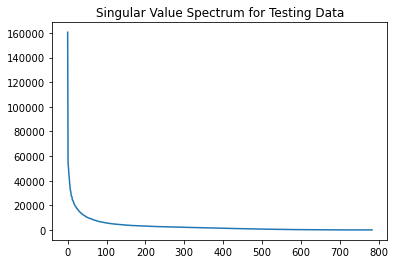

In [152]:
plt.figure()
plt.plot(S1)
plt.imshow
plt.title('Singular Value Spectrum for Testing Data')


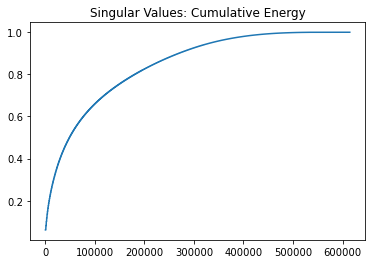

[0.06111084 0.08185737 0.1010087  0.11879229 0.13531998 0.15026242
 0.16397691 0.1762492  0.1884488  0.1995015  0.20998416 0.22028134
 0.22969999 0.23909062 0.24815952]
 rank =  343 is enough to reconstruct the data


In [196]:
plt.figure(3)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Energy')
plt.show()
#print(S[:10])
#print(S.shape)

list = np.cumsum(S)/np.sum(np.diag(S))

mylist = next(k for k,val in enumerate(list)
              if val > 0.9)
print(list[:15])
print(" rank = ", mylist, 'is enough to reconstruct the data')


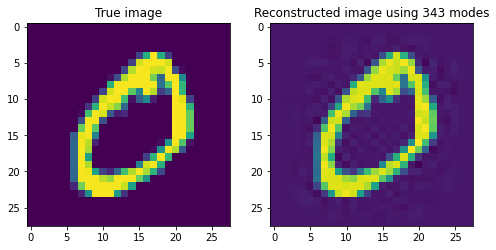

In [195]:
f, ax = plt.subplots(1,2,figsize=(8,8))
ax[0].imshow(train_digits_X[1].reshape(28,28))
ax[0].set_title('True image')
ax[1].imshow((U[:,:mylist]@np.diag(S)[:mylist,:mylist]@VT[:mylist,:])[1].reshape(28,28))
ax[1].set_title('Reconstructed image using '+ str(mylist)+ ' modes');


In [158]:
# Interpretation of U, S, V = M


# U is the singular vectors of matrix M. It contains the orthogonal basis for the colum space of M.
# S is the singular values and represents the scaling factor of the singular vectors from U. 
# V matrix represents the importance of each feature to an individual image.

####  d) project on te selected V modes colored by their digit label


(60000, 784)
(784, 60000)


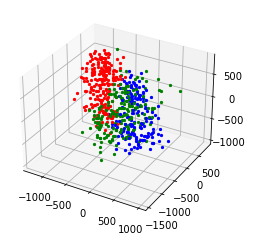

In [170]:
print(train_digits_X.shape)
train_data = train_digits_X.T
print(train_data.shape)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection = '3d')
#ax.scatter(VT[1,2],VT[1,3],VT[1,5],c='r',marker='o',s=20)
#ax.scatter(VT[2,2],VT[2,3],VT[2,5],c='r',marker='o',s=20)

for k in range(2000):
    x = VT[1,:]@train_data[:,k]
    y = VT[3,:]@train_data[:,k]
    z = VT[5,:]@train_data[:,k]
    
    if train_y[k] ==1:
        ax.scatter(x,y,z, marker='.', color='r', s=20)
    if train_y[k] ==3:
        ax.scatter(x,y,z, marker='.', color='g', s=20)
    if train_y[k] ==5:
        ax.scatter(x,y,z, marker='.', color='b', s=20)
plt.show()


In [173]:
print(train_digits_X.shape)
print(train_data[2].shape)
print(train_X.shape)

print(U.shape)

(60000, 784)
(60000,)
(60000, 28, 28)
(60000, 784)


##### (e) Build LDA


In [317]:
# get index where labels are 0 and 1
a = np.where((train_y)==0)
b = np.where(train_y ==1)


In [318]:
index = np.append(a, b)

c = np.where(test_y ==0)
d = np.where(test_y ==1)

indexTest = np.append(c[0],d[0])

In [319]:
# Get dataset which coresponds to label 0 and 1
train_Xab = np.take(train_digits_X, index, axis=0)
train_yab = np.take(train_y, index, axis=0)

test_Xab = np.take(test_digits_X, indexTest, axis=0)
test_yab = np.take(test_y, indexTest, axis=0)

In [320]:
lda = LinearDiscriminantAnalysis()
LDA = lda.fit(train_Xab, train_yab)


In [321]:
test_labels = LDA.predict(test_Xab)
from sklearn.metrics import confusion_matrix, accuracy_score

acc_LDA = accuracy_score(test_yab,test_labels)
print("Accuracy", acc_LDA)


Accuracy 0.9938534278959811


In [353]:
print(index.shape)
print(indexTest.shape)
print(train_digits_X.shape)


(12665,)
(2115,)
(60000, 784)


In [351]:
# (f) Try 3 digits

q = np.where(train_y ==3)
w = np.where(test_y ==3)

#index3 = np.append(index,q[0])
index3= np.concatenate((a[0],b[0],q[0]))
index4 = np.concatenate((c[0],d[0],w[0]))
index33=np.asarray(index3)
train_Xab3 = np.take(train_digits_X, index33, axis=0)

train_yab3 = np.take(train_y, index3, axis=0)
print(index4.shape)
print(index3.shape)
test_Xab3 = np.take(test_digits_X, index4, axis=0)
test_yab3 = np.take(test_y, index4, axis=0)
lda = LinearDiscriminantAnalysis()

LDA = lda.fit(train_Xab3, train_yab3)


(3125,)
(18796,)


In [352]:
test_labels3 = LDA.predict(test_Xab3)
from sklearn.metrics import confusion_matrix, accuracy_score

acc_LDA = accuracy_score(test_yab3,test_labels3)
print("Accuracy", acc_LDA)

Accuracy 0.98912


In [355]:
# (g)

LDA_Whole = lda.fit(train_digits_X, train_y)
Whole_Test_predict = LDA_Whole.predict(test_digits_X)

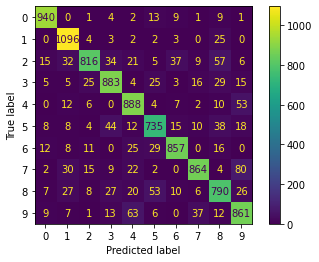

In [356]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, Whole_Test_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [358]:
print("The two digits that are most difficult to separate are 5 and 8")             
print("The two digits that are most easy to separate are 0 and 1")             


The two digits that are most difficult to separate are 5 and 8
The two digits that are most easy to separate are 0 and 1
